<a href="https://colab.research.google.com/github/Moukthika1253/Facial_Expression_ImageClassifier/blob/main/facial_expression_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import seaborn as sns
import tensorflow as tf

<Axes: >

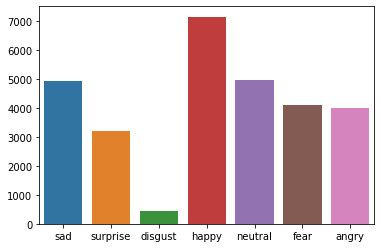

In [3]:
train_data="/content/images/train"
test_data="/content/images/validation"
train_count=[]
exp_list=[]
for emotion in os.listdir(train_data):
  exp_list.append(emotion)
  train_count.append(len(os.listdir(train_data+"/"+emotion)))
sns.barplot(x=exp_list,y=train_count)


<Axes: >

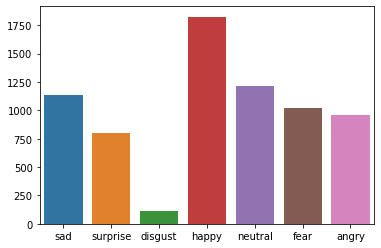

In [13]:
test_count=[]
for emotion in os.listdir(test_data):
  test_count.append(len(os.listdir(test_data+"/"+emotion)))
sns.barplot(x=exp_list,y=test_count)

**Face Expression images**

     sad            surprise            disgust            happy            neutral            fear            angry       

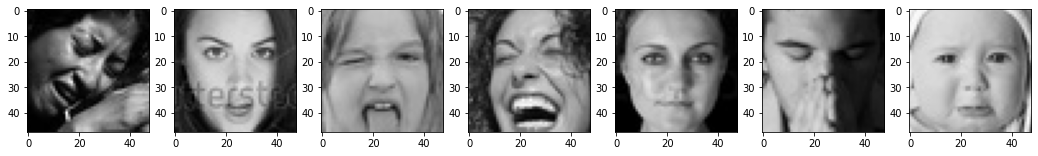

In [14]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
i=0
_, axes = plt.subplots(1, 7, figsize=(18, 16))
axes = axes.flatten()
for emotion,a in zip(os.listdir(train_data),axes):
   images=image.load_img(train_data+"/"+emotion+"/"+os.listdir(train_data+"/"+emotion)[0])
   print("     "+exp_list[i],end="       ")
   a.imshow(images,cmap="gray")
   i=i+1
plt.show()



# **Image Generator**

The directory must be set to the path where your ‘n’ classes of folders are present.
The target_size is the size of your input images, every image will be resized to this size.
color_mode: if the image is either black and white or grayscale set “grayscale” or if the image has three color channels, set “rgb”.
batch_size: No. of images to be yielded from the generator per batch.
class_mode: Set “binary” if you have only two classes to predict, if not set to“categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.
shuffle: Set True if you want to shuffle the order of the image that is being yielded, else set False.
seed: Random seed for applying random image augmentation and shuffling the order of the image.

In [15]:
from keras.preprocessing.image import ImageDataGenerator
data_train = ImageDataGenerator()
data_validation=ImageDataGenerator()
train_gen=data_train.flow_from_directory(train_data,target_size=(48,48),
                                                    color_mode="grayscale",
                                                    class_mode='categorical',
                                                    shuffle=True,seed=42)
validation_gen=data_validation.flow_from_directory(test_data,target_size=(48,48),
                                                    color_mode="grayscale",
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# **Building Convolutional Neural Networks (CNN)**

**Importing libraries to build CNN**

In [19]:
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D,Conv3D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import SGD,Adagrad,Adadelta,Adam
from keras.regularizers import l1,l2


**Model with 2 convolution layers and 2 fully connected layers optimizer=SGD activation = sigmoid**

In [63]:
model=Sequential()
#first convolution layer
model.add(Conv2D(32,(3,3),strides=(1,1),padding="same",input_shape=(48, 48,1),kernel_regularizer=l1(0.0001)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

#second convolution layer
model.add(Conv2D(64,(3,3),strides=(2,2),padding="same",kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())

#1st fully connected layer
model.add(Dense(512,kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))

#2nd fully connected layer
model.add(Dense(1024,kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))

#last layer
model.add(Dense(7))
model.add(Activation('softmax'))

#compiling model
opti=SGD(learning_rate=0.01)
model.compile(optimizer=opti,loss='categorical_crossentropy',metrics=['accuracy'])


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)       

In [26]:
train_time={}

**Training the model**

In [64]:
%%time
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

batch_size=150
history = model.fit(train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=50,
                                validation_data = validation_gen,
                                validation_steps = validation_gen.n//validation_gen.batch_size,
                                callbacks=callbacks_list)



Epoch 1/50
899/900 [============================>.] - ETA: 0s - loss: 2.1200 - accuracy: 0.2184

900/900 [==============================] - 17s 18ms/step - loss: 2.1200 - accuracy: 0.2184 - val_loss: 1.9044 - val_accuracy: 0.2986
Epoch 2/50
898/900 [============================>.] - ETA: 0s - loss: 2.0080 - accuracy: 0.2418

900/900 [==============================] - 16s 18ms/step - loss: 2.0083 - accuracy: 0.2417 - val_loss: 1.8811 - val_accuracy: 0.3170
Epoch 3/50
898/900 [============================>.] - ETA: 0s - loss: 1.9615 - accuracy: 0.2633

900/900 [==============================] - 16s 18ms/step - loss: 1.9614 - accuracy: 0.2633 - val_loss: 1.8717 - val_accuracy: 0.3260
Epoch 4/50
898/900 [============================>.] - ETA: 0s - loss: 1.9363 - accuracy: 0.2776

900/900 [==============================] - 17s 18ms/step - loss: 1.9363 - accuracy: 0.2776 - val_loss: 1.8634 - val_accuracy: 0.3095
Epoch 5/50
899/900 [============================>.] - ETA: 0s - loss: 1.9071 - accuracy: 0.2938

900/900 [==============================] - 16s 18ms/step - loss: 1.9071 - accuracy: 0.2937 - val_loss: 1.8750 - val_accuracy: 0.3234
Epoch 6/50
900/900 [==============================] - ETA: 0s - loss: 1.8926 - accuracy: 0.2996

900/900 [==============================] - 16s 18ms/step - loss: 1.8926 - accuracy: 0.2996 - val_loss: 1.8259 - val_accuracy: 0.3186
Epoch 7/50
896/900 [============================>.] - ETA: 0s - loss: 1.8781 - accuracy: 0.3135

900/900 [==============================] - 16s 18ms/step - loss: 1.8783 - accuracy: 0.3135 - val_loss: 1.8021 - val_accuracy: 0.3571
Epoch 8/50
898/900 [============================>.] - ETA: 0s - loss: 1.8611 - accuracy: 0.3226

900/900 [==============================] - 16s 18ms/step - loss: 1.8615 - accuracy: 0.3224 - val_loss: 1.8069 - val_accuracy: 0.3635
Epoch 9/50
897/900 [============================>.] - ETA: 0s - loss: 1.8467 - accuracy: 0.3288

900/900 [==============================] - 19s 21ms/step - loss: 1.8468 - accuracy: 0.3286 - val_loss: 1.7836 - val_accuracy: 0.3544
Epoch 10/50
899/900 [============================>.] - ETA: 0s - loss: 1.8371 - accuracy: 0.3327

900/900 [==============================] - 17s 19ms/step - loss: 1.8372 - accuracy: 0.3327 - val_loss: 1.7928 - val_accuracy: 0.3652
Epoch 11/50
900/900 [==============================] - ETA: 0s - loss: 1.8225 - accuracy: 0.3424

900/900 [==============================] - 16s 18ms/step - loss: 1.8225 - accuracy: 0.3424 - val_loss: 1.7576 - val_accuracy: 0.3881
Epoch 12/50
898/900 [============================>.] - ETA: 0s - loss: 1.8135 - accuracy: 0.3423

900/900 [==============================] - 19s 21ms/step - loss: 1.8136 - accuracy: 0.3420 - val_loss: 1.7430 - val_accuracy: 0.3838
Epoch 13/50
900/900 [==============================] - ETA: 0s - loss: 1.8045 - accuracy: 0.3494

900/900 [==============================] - 16s 17ms/step - loss: 1.8045 - accuracy: 0.3494 - val_loss: 1.7064 - val_accuracy: 0.4009
Epoch 14/50
900/900 [==============================] - ETA: 0s - loss: 1.7993 - accuracy: 0.3489

900/900 [==============================] - 16s 18ms/step - loss: 1.7993 - accuracy: 0.3489 - val_loss: 1.7361 - val_accuracy: 0.3925
Epoch 15/50
898/900 [============================>.] - ETA: 0s - loss: 1.7894 - accuracy: 0.3580

900/900 [==============================] - 17s 18ms/step - loss: 1.7897 - accuracy: 0.3578 - val_loss: 1.7189 - val_accuracy: 0.3879
Epoch 16/50
897/900 [============================>.] - ETA: 0s - loss: 1.7849 - accuracy: 0.3599

900/900 [==============================] - 16s 18ms/step - loss: 1.7847 - accuracy: 0.3599 - val_loss: 1.7521 - val_accuracy: 0.3901
Epoch 17/50
899/900 [============================>.] - ETA: 0s - loss: 1.7724 - accuracy: 0.3647

900/900 [==============================] - 16s 18ms/step - loss: 1.7725 - accuracy: 0.3645 - val_loss: 1.6768 - val_accuracy: 0.4095
Epoch 18/50
899/900 [============================>.] - ETA: 0s - loss: 1.7659 - accuracy: 0.3678

900/900 [==============================] - 16s 18ms/step - loss: 1.7659 - accuracy: 0.3678 - val_loss: 1.6754 - val_accuracy: 0.4142
Epoch 19/50
897/900 [============================>.] - ETA: 0s - loss: 1.7652 - accuracy: 0.3698

900/900 [==============================] - 16s 18ms/step - loss: 1.7651 - accuracy: 0.3698 - val_loss: 1.7114 - val_accuracy: 0.4038
Epoch 20/50
899/900 [============================>.] - ETA: 0s - loss: 1.7520 - accuracy: 0.3708

900/900 [==============================] - 17s 19ms/step - loss: 1.7521 - accuracy: 0.3706 - val_loss: 1.6742 - val_accuracy: 0.3986
Epoch 21/50
897/900 [============================>.] - ETA: 0s - loss: 1.7508 - accuracy: 0.3743

900/900 [==============================] - 16s 18ms/step - loss: 1.7509 - accuracy: 0.3744 - val_loss: 1.7125 - val_accuracy: 0.3852
Epoch 22/50
897/900 [============================>.] - ETA: 0s - loss: 1.7405 - accuracy: 0.3820

900/900 [==============================] - 17s 18ms/step - loss: 1.7402 - accuracy: 0.3822 - val_loss: 1.6660 - val_accuracy: 0.4068
Epoch 23/50
897/900 [============================>.] - ETA: 0s - loss: 1.7367 - accuracy: 0.3813

900/900 [==============================] - 17s 19ms/step - loss: 1.7366 - accuracy: 0.3813 - val_loss: 1.6660 - val_accuracy: 0.4122
Epoch 24/50
897/900 [============================>.] - ETA: 0s - loss: 1.7304 - accuracy: 0.3819

900/900 [==============================] - 17s 18ms/step - loss: 1.7304 - accuracy: 0.3820 - val_loss: 1.6509 - val_accuracy: 0.4203
Epoch 25/50
898/900 [============================>.] - ETA: 0s - loss: 1.7257 - accuracy: 0.3853

900/900 [==============================] - 19s 22ms/step - loss: 1.7261 - accuracy: 0.3852 - val_loss: 1.6252 - val_accuracy: 0.4352
Epoch 26/50
899/900 [============================>.] - ETA: 0s - loss: 1.7182 - accuracy: 0.3887

900/900 [==============================] - 17s 18ms/step - loss: 1.7182 - accuracy: 0.3888 - val_loss: 1.6474 - val_accuracy: 0.4286
Epoch 27/50
899/900 [============================>.] - ETA: 0s - loss: 1.7118 - accuracy: 0.3909

900/900 [==============================] - 19s 22ms/step - loss: 1.7116 - accuracy: 0.3909 - val_loss: 1.6205 - val_accuracy: 0.4297
Epoch 28/50
899/900 [============================>.] - ETA: 0s - loss: 1.7027 - accuracy: 0.3933

900/900 [==============================] - 16s 18ms/step - loss: 1.7027 - accuracy: 0.3933 - val_loss: 1.6504 - val_accuracy: 0.4244
Epoch 29/50
899/900 [============================>.] - ETA: 0s - loss: 1.6989 - accuracy: 0.3951

900/900 [==============================] - 18s 19ms/step - loss: 1.6987 - accuracy: 0.3952 - val_loss: 1.6222 - val_accuracy: 0.4317
Epoch 30/50
898/900 [============================>.] - ETA: 0s - loss: 1.6951 - accuracy: 0.3954

900/900 [==============================] - 17s 19ms/step - loss: 1.6952 - accuracy: 0.3953 - val_loss: 1.6204 - val_accuracy: 0.4317
Epoch 31/50
899/900 [============================>.] - ETA: 0s - loss: 1.6877 - accuracy: 0.3980

900/900 [==============================] - 19s 21ms/step - loss: 1.6877 - accuracy: 0.3982 - val_loss: 1.5972 - val_accuracy: 0.4369
Epoch 32/50
897/900 [============================>.] - ETA: 0s - loss: 1.6874 - accuracy: 0.3974

900/900 [==============================] - 16s 18ms/step - loss: 1.6871 - accuracy: 0.3977 - val_loss: 1.7411 - val_accuracy: 0.4045
Epoch 33/50
898/900 [============================>.] - ETA: 0s - loss: 1.6807 - accuracy: 0.4011

900/900 [==============================] - 16s 18ms/step - loss: 1.6810 - accuracy: 0.4011 - val_loss: 1.5847 - val_accuracy: 0.4366
Epoch 34/50
900/900 [==============================] - ETA: 0s - loss: 1.6735 - accuracy: 0.4038

900/900 [==============================] - 16s 18ms/step - loss: 1.6735 - accuracy: 0.4038 - val_loss: 1.5937 - val_accuracy: 0.4378
Epoch 35/50
897/900 [============================>.] - ETA: 0s - loss: 1.6684 - accuracy: 0.4085

900/900 [==============================] - 16s 18ms/step - loss: 1.6688 - accuracy: 0.4085 - val_loss: 1.5670 - val_accuracy: 0.4483
Epoch 36/50
899/900 [============================>.] - ETA: 0s - loss: 1.6630 - accuracy: 0.4097

900/900 [==============================] - 16s 18ms/step - loss: 1.6627 - accuracy: 0.4098 - val_loss: 1.5779 - val_accuracy: 0.4426
Epoch 37/50
898/900 [============================>.] - ETA: 0s - loss: 1.6524 - accuracy: 0.4128

900/900 [==============================] - 17s 18ms/step - loss: 1.6523 - accuracy: 0.4128 - val_loss: 1.6906 - val_accuracy: 0.4232
Epoch 38/50
900/900 [==============================] - ETA: 0s - loss: 1.6541 - accuracy: 0.4152

900/900 [==============================] - 17s 19ms/step - loss: 1.6541 - accuracy: 0.4152 - val_loss: 1.7052 - val_accuracy: 0.4200
Epoch 39/50
900/900 [==============================] - ETA: 0s - loss: 1.6462 - accuracy: 0.4177

900/900 [==============================] - 16s 18ms/step - loss: 1.6462 - accuracy: 0.4177 - val_loss: 1.5941 - val_accuracy: 0.4455
Epoch 40/50
900/900 [==============================] - ETA: 0s - loss: 1.6363 - accuracy: 0.4195

900/900 [==============================] - 19s 22ms/step - loss: 1.6363 - accuracy: 0.4195 - val_loss: 1.5942 - val_accuracy: 0.4422
Epoch 41/50
899/900 [============================>.] - ETA: 0s - loss: 1.6313 - accuracy: 0.4225

900/900 [==============================] - 17s 18ms/step - loss: 1.6314 - accuracy: 0.4224 - val_loss: 1.5362 - val_accuracy: 0.4621
Epoch 42/50
899/900 [============================>.] - ETA: 0s - loss: 1.6317 - accuracy: 0.4213

900/900 [==============================] - 17s 19ms/step - loss: 1.6316 - accuracy: 0.4213 - val_loss: 1.5772 - val_accuracy: 0.4486
Epoch 43/50
899/900 [============================>.] - ETA: 0s - loss: 1.6269 - accuracy: 0.4233

900/900 [==============================] - 17s 19ms/step - loss: 1.6268 - accuracy: 0.4233 - val_loss: 1.6048 - val_accuracy: 0.4455
Epoch 44/50
900/900 [==============================] - ETA: 0s - loss: 1.6234 - accuracy: 0.4275

900/900 [==============================] - 18s 20ms/step - loss: 1.6234 - accuracy: 0.4275 - val_loss: 1.5220 - val_accuracy: 0.4608
Epoch 45/50
899/900 [============================>.] - ETA: 0s - loss: 1.6177 - accuracy: 0.4288

900/900 [==============================] - 17s 19ms/step - loss: 1.6175 - accuracy: 0.4288 - val_loss: 1.6043 - val_accuracy: 0.4347
Epoch 46/50
900/900 [==============================] - ETA: 0s - loss: 1.6096 - accuracy: 0.4288

900/900 [==============================] - 20s 22ms/step - loss: 1.6096 - accuracy: 0.4288 - val_loss: 1.6852 - val_accuracy: 0.4251
Epoch 47/50
899/900 [============================>.] - ETA: 0s - loss: 1.6039 - accuracy: 0.4335

900/900 [==============================] - 17s 19ms/step - loss: 1.6042 - accuracy: 0.4333 - val_loss: 1.5249 - val_accuracy: 0.4683
Epoch 48/50
899/900 [============================>.] - ETA: 0s - loss: 1.6047 - accuracy: 0.4347

900/900 [==============================] - 19s 21ms/step - loss: 1.6047 - accuracy: 0.4347 - val_loss: 1.5718 - val_accuracy: 0.4467
Epoch 49/50
899/900 [============================>.] - ETA: 0s - loss: 1.5976 - accuracy: 0.4359

900/900 [==============================] - 17s 18ms/step - loss: 1.5976 - accuracy: 0.4359 - val_loss: 1.5045 - val_accuracy: 0.4737
Epoch 50/50
898/900 [============================>.] - ETA: 0s - loss: 1.5841 - accuracy: 0.4387

900/900 [==============================] - 19s 21ms/step - loss: 1.5841 - accuracy: 0.4386 - val_loss: 1.5489 - val_accuracy: 0.4533
CPU times: user 16min 32s, sys: 1min 22s, total: 17min 54s
Wall time: 15min 30s


In [65]:
train_time['SGD']=15.30

**Performance using SGD optimizer and Sigmoid activation function**

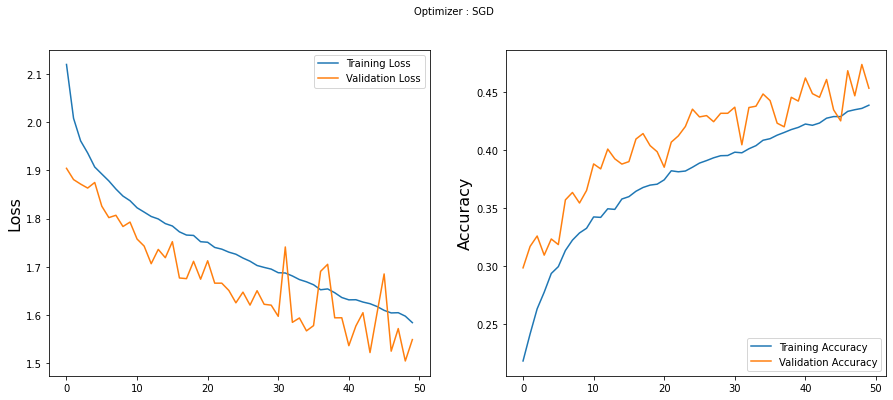

In [66]:

import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : SGD', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

**CNN with 4 convolutional layers, 3 hidden layers optimizer=Adagrad activation=Relu**

In [41]:
model=Sequential()
#first convolution layer
model.add(Conv2D(64,(3,3),strides=(1,1),padding="same",input_shape=(48, 48,1),kernel_regularizer=l1(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.27))

#second convolution layer
model.add(Conv2D(128,(3,3),strides=(1,1),padding="same",kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.27))

#third convolution layer
model.add(Conv2D(256,(3,3),strides=(2,2),padding="same",kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.27))

#fourth convolution layer
model.add(Conv2D(512,(3,3),strides=(2,2),padding="same",kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.27))

model.add(Flatten())

#1st fully connected layer
model.add(Dense(1024,kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.27))

#2nd fully connected layer
model.add(Dense(512,kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.27))

#2nd fully connected layer
model.add(Dense(256,kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.27))


#last layer
model.add(Dense(7))
model.add(Activation('softmax'))

#compiling model
opti=Adagrad(learning_rate=0.01)
model.compile(optimizer=opti,loss='categorical_crossentropy',metrics=['accuracy'])


In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

**Training the model**

In [45]:
%%time
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

batch_size=150
history = model.fit(train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=50,
                                validation_data = validation_gen,
                                validation_steps = validation_gen.n//validation_gen.batch_size,
                                callbacks=callbacks_list)

Epoch 1/50
900/900 [==============================] - ETA: 0s - loss: 2.5558 - accuracy: 0.2887

900/900 [==============================] - 20s 22ms/step - loss: 2.5558 - accuracy: 0.2887 - val_loss: 2.7441 - val_accuracy: 0.2803
Epoch 2/50
899/900 [============================>.] - ETA: 0s - loss: 2.3579 - accuracy: 0.3578

900/900 [==============================] - 20s 22ms/step - loss: 2.3576 - accuracy: 0.3579 - val_loss: 2.1913 - val_accuracy: 0.4313
Epoch 3/50
898/900 [============================>.] - ETA: 0s - loss: 2.2405 - accuracy: 0.3913

900/900 [==============================] - 21s 23ms/step - loss: 2.2404 - accuracy: 0.3914 - val_loss: 2.0951 - val_accuracy: 0.4528
Epoch 4/50
899/900 [============================>.] - ETA: 0s - loss: 2.1416 - accuracy: 0.4181

900/900 [==============================] - 22s 25ms/step - loss: 2.1417 - accuracy: 0.4181 - val_loss: 2.0933 - val_accuracy: 0.4429
Epoch 5/50
898/900 [============================>.] - ETA: 0s - loss: 2.0667 - accuracy: 0.4340

900/900 [==============================] - 21s 24ms/step - loss: 2.0665 - accuracy: 0.4342 - val_loss: 1.9895 - val_accuracy: 0.4638
Epoch 6/50
900/900 [==============================] - ETA: 0s - loss: 1.9958 - accuracy: 0.4520

900/900 [==============================] - 21s 24ms/step - loss: 1.9958 - accuracy: 0.4520 - val_loss: 1.9220 - val_accuracy: 0.4787
Epoch 7/50
898/900 [============================>.] - ETA: 0s - loss: 1.9306 - accuracy: 0.4656

900/900 [==============================] - 20s 22ms/step - loss: 1.9311 - accuracy: 0.4654 - val_loss: 1.8633 - val_accuracy: 0.4884
Epoch 8/50
898/900 [============================>.] - ETA: 0s - loss: 1.8727 - accuracy: 0.4840

900/900 [==============================] - 20s 22ms/step - loss: 1.8730 - accuracy: 0.4838 - val_loss: 1.8023 - val_accuracy: 0.5054
Epoch 9/50
899/900 [============================>.] - ETA: 0s - loss: 1.8260 - accuracy: 0.4906

900/900 [==============================] - 19s 22ms/step - loss: 1.8258 - accuracy: 0.4907 - val_loss: 1.7296 - val_accuracy: 0.5236
Epoch 10/50
898/900 [============================>.] - ETA: 0s - loss: 1.7896 - accuracy: 0.4997

900/900 [==============================] - 20s 23ms/step - loss: 1.7893 - accuracy: 0.4998 - val_loss: 1.7193 - val_accuracy: 0.5180
Epoch 11/50
900/900 [==============================] - ETA: 0s - loss: 1.7492 - accuracy: 0.5070

900/900 [==============================] - 22s 24ms/step - loss: 1.7492 - accuracy: 0.5070 - val_loss: 1.6884 - val_accuracy: 0.5207
Epoch 12/50
897/900 [============================>.] - ETA: 0s - loss: 1.7217 - accuracy: 0.5113

900/900 [==============================] - 20s 22ms/step - loss: 1.7212 - accuracy: 0.5112 - val_loss: 1.7056 - val_accuracy: 0.5210
Epoch 13/50
898/900 [============================>.] - ETA: 0s - loss: 1.6860 - accuracy: 0.5214

900/900 [==============================] - 21s 23ms/step - loss: 1.6858 - accuracy: 0.5213 - val_loss: 1.6229 - val_accuracy: 0.5446
Epoch 14/50
899/900 [============================>.] - ETA: 0s - loss: 1.6596 - accuracy: 0.5276

900/900 [==============================] - 22s 25ms/step - loss: 1.6597 - accuracy: 0.5277 - val_loss: 1.5762 - val_accuracy: 0.5589
Epoch 15/50
900/900 [==============================] - ETA: 0s - loss: 1.6312 - accuracy: 0.5356

900/900 [==============================] - 21s 23ms/step - loss: 1.6312 - accuracy: 0.5356 - val_loss: 1.5675 - val_accuracy: 0.5534
Epoch 16/50
898/900 [============================>.] - ETA: 0s - loss: 1.6039 - accuracy: 0.5387

900/900 [==============================] - 20s 22ms/step - loss: 1.6042 - accuracy: 0.5385 - val_loss: 1.5476 - val_accuracy: 0.5607
Epoch 17/50
898/900 [============================>.] - ETA: 0s - loss: 1.5816 - accuracy: 0.5459

900/900 [==============================] - 20s 22ms/step - loss: 1.5812 - accuracy: 0.5459 - val_loss: 1.6124 - val_accuracy: 0.5396
Epoch 18/50
900/900 [==============================] - ETA: 0s - loss: 1.5614 - accuracy: 0.5484

900/900 [==============================] - 21s 23ms/step - loss: 1.5614 - accuracy: 0.5484 - val_loss: 1.6459 - val_accuracy: 0.5243
Epoch 19/50
898/900 [============================>.] - ETA: 0s - loss: 1.5451 - accuracy: 0.5526

900/900 [==============================] - 20s 22ms/step - loss: 1.5447 - accuracy: 0.5528 - val_loss: 1.4826 - val_accuracy: 0.5786
Epoch 20/50
899/900 [============================>.] - ETA: 0s - loss: 1.5209 - accuracy: 0.5623

900/900 [==============================] - 20s 23ms/step - loss: 1.5207 - accuracy: 0.5624 - val_loss: 1.5361 - val_accuracy: 0.5560
Epoch 21/50
899/900 [============================>.] - ETA: 0s - loss: 1.5048 - accuracy: 0.5639

900/900 [==============================] - 19s 22ms/step - loss: 1.5048 - accuracy: 0.5638 - val_loss: 1.4766 - val_accuracy: 0.5864
Epoch 22/50
900/900 [==============================] - ETA: 0s - loss: 1.4867 - accuracy: 0.5699

900/900 [==============================] - 19s 21ms/step - loss: 1.4867 - accuracy: 0.5699 - val_loss: 1.4463 - val_accuracy: 0.5895
Epoch 23/50
898/900 [============================>.] - ETA: 0s - loss: 1.4717 - accuracy: 0.5765

900/900 [==============================] - 20s 22ms/step - loss: 1.4720 - accuracy: 0.5765 - val_loss: 1.4972 - val_accuracy: 0.5638
Epoch 24/50
900/900 [==============================] - ETA: 0s - loss: 1.4561 - accuracy: 0.5780

900/900 [==============================] - 20s 22ms/step - loss: 1.4561 - accuracy: 0.5780 - val_loss: 1.4370 - val_accuracy: 0.5952
Epoch 25/50
899/900 [============================>.] - ETA: 0s - loss: 1.4443 - accuracy: 0.5814

900/900 [==============================] - 21s 23ms/step - loss: 1.4444 - accuracy: 0.5813 - val_loss: 1.5412 - val_accuracy: 0.5501
Epoch 26/50
899/900 [============================>.] - ETA: 0s - loss: 1.4242 - accuracy: 0.5892

900/900 [==============================] - 20s 22ms/step - loss: 1.4240 - accuracy: 0.5893 - val_loss: 1.4541 - val_accuracy: 0.5803
Epoch 27/50
898/900 [============================>.] - ETA: 0s - loss: 1.4133 - accuracy: 0.5927

900/900 [==============================] - 20s 23ms/step - loss: 1.4138 - accuracy: 0.5926 - val_loss: 1.5100 - val_accuracy: 0.5656
Epoch 28/50
900/900 [==============================] - ETA: 0s - loss: 1.4006 - accuracy: 0.5946

900/900 [==============================] - 27s 30ms/step - loss: 1.4006 - accuracy: 0.5946 - val_loss: 1.4657 - val_accuracy: 0.5764
Epoch 29/50
899/900 [============================>.] - ETA: 0s - loss: 1.3826 - accuracy: 0.6018

900/900 [==============================] - 26s 29ms/step - loss: 1.3827 - accuracy: 0.6018 - val_loss: 1.4093 - val_accuracy: 0.6014
Epoch 30/50
900/900 [==============================] - ETA: 0s - loss: 1.3747 - accuracy: 0.6015

900/900 [==============================] - 20s 22ms/step - loss: 1.3747 - accuracy: 0.6015 - val_loss: 1.4127 - val_accuracy: 0.5990
Epoch 31/50
897/900 [============================>.] - ETA: 0s - loss: 1.3639 - accuracy: 0.6072

900/900 [==============================] - 20s 22ms/step - loss: 1.3633 - accuracy: 0.6075 - val_loss: 1.4283 - val_accuracy: 0.5932
Epoch 32/50
898/900 [============================>.] - ETA: 0s - loss: 1.3524 - accuracy: 0.6109

900/900 [==============================] - 22s 24ms/step - loss: 1.3521 - accuracy: 0.6111 - val_loss: 1.3863 - val_accuracy: 0.6061
Epoch 33/50
900/900 [==============================] - ETA: 0s - loss: 1.3400 - accuracy: 0.6139

900/900 [==============================] - 20s 23ms/step - loss: 1.3400 - accuracy: 0.6139 - val_loss: 1.3846 - val_accuracy: 0.6021
Epoch 34/50
899/900 [============================>.] - ETA: 0s - loss: 1.3250 - accuracy: 0.6195

900/900 [==============================] - 22s 24ms/step - loss: 1.3248 - accuracy: 0.6195 - val_loss: 1.3668 - val_accuracy: 0.6159
Epoch 35/50
899/900 [============================>.] - ETA: 0s - loss: 1.3157 - accuracy: 0.6250

900/900 [==============================] - 20s 22ms/step - loss: 1.3162 - accuracy: 0.6250 - val_loss: 1.3880 - val_accuracy: 0.6017
Epoch 36/50
899/900 [============================>.] - ETA: 0s - loss: 1.3062 - accuracy: 0.6273

900/900 [==============================] - 21s 24ms/step - loss: 1.3063 - accuracy: 0.6273 - val_loss: 1.3697 - val_accuracy: 0.6067
Epoch 37/50
899/900 [============================>.] - ETA: 0s - loss: 1.3033 - accuracy: 0.6270

900/900 [==============================] - 19s 21ms/step - loss: 1.3029 - accuracy: 0.6273 - val_loss: 1.3909 - val_accuracy: 0.6014
Epoch 38/50
900/900 [==============================] - ETA: 0s - loss: 1.2886 - accuracy: 0.6319

900/900 [==============================] - 20s 22ms/step - loss: 1.2886 - accuracy: 0.6319 - val_loss: 1.3750 - val_accuracy: 0.6089
Epoch 39/50
897/900 [============================>.] - ETA: 0s - loss: 1.2744 - accuracy: 0.6357

900/900 [==============================] - 19s 21ms/step - loss: 1.2747 - accuracy: 0.6357 - val_loss: 1.3762 - val_accuracy: 0.6072
Epoch 40/50
900/900 [==============================] - ETA: 0s - loss: 1.2712 - accuracy: 0.6377

900/900 [==============================] - 20s 22ms/step - loss: 1.2712 - accuracy: 0.6377 - val_loss: 1.3953 - val_accuracy: 0.6098
Epoch 41/50
898/900 [============================>.] - ETA: 0s - loss: 1.2550 - accuracy: 0.6447

900/900 [==============================] - 22s 25ms/step - loss: 1.2548 - accuracy: 0.6447 - val_loss: 1.3739 - val_accuracy: 0.6179
Epoch 42/50
900/900 [==============================] - ETA: 0s - loss: 1.2462 - accuracy: 0.6475

900/900 [==============================] - 20s 22ms/step - loss: 1.2462 - accuracy: 0.6475 - val_loss: 1.3499 - val_accuracy: 0.6197
Epoch 43/50
899/900 [============================>.] - ETA: 0s - loss: 1.2391 - accuracy: 0.6511

900/900 [==============================] - 20s 22ms/step - loss: 1.2393 - accuracy: 0.6510 - val_loss: 1.3915 - val_accuracy: 0.6097
Epoch 44/50
899/900 [============================>.] - ETA: 0s - loss: 1.2344 - accuracy: 0.6503

900/900 [==============================] - 19s 21ms/step - loss: 1.2342 - accuracy: 0.6504 - val_loss: 1.3780 - val_accuracy: 0.6151
Epoch 45/50
900/900 [==============================] - ETA: 0s - loss: 1.2184 - accuracy: 0.6611

900/900 [==============================] - 20s 22ms/step - loss: 1.2184 - accuracy: 0.6611 - val_loss: 1.3562 - val_accuracy: 0.6156
Epoch 46/50
897/900 [============================>.] - ETA: 0s - loss: 1.2084 - accuracy: 0.6602

900/900 [==============================] - 19s 21ms/step - loss: 1.2083 - accuracy: 0.6604 - val_loss: 1.3555 - val_accuracy: 0.6222
Epoch 47/50
899/900 [============================>.] - ETA: 0s - loss: 1.2022 - accuracy: 0.6633

900/900 [==============================] - 20s 22ms/step - loss: 1.2019 - accuracy: 0.6634 - val_loss: 1.3345 - val_accuracy: 0.6295
Epoch 48/50
900/900 [==============================] - ETA: 0s - loss: 1.1936 - accuracy: 0.6670

900/900 [==============================] - 22s 25ms/step - loss: 1.1936 - accuracy: 0.6670 - val_loss: 1.3789 - val_accuracy: 0.6112
Epoch 49/50
899/900 [============================>.] - ETA: 0s - loss: 1.1921 - accuracy: 0.6685

900/900 [==============================] - 20s 22ms/step - loss: 1.1922 - accuracy: 0.6685 - val_loss: 1.3487 - val_accuracy: 0.6303
Epoch 50/50
899/900 [============================>.] - ETA: 0s - loss: 1.1804 - accuracy: 0.6721

900/900 [==============================] - 22s 24ms/step - loss: 1.1803 - accuracy: 0.6721 - val_loss: 1.3837 - val_accuracy: 0.6122
CPU times: user 21min 17s, sys: 1min 28s, total: 22min 46s
Wall time: 20min 46s


In [46]:
train_time['Adagrad']=20.46

**Performance**

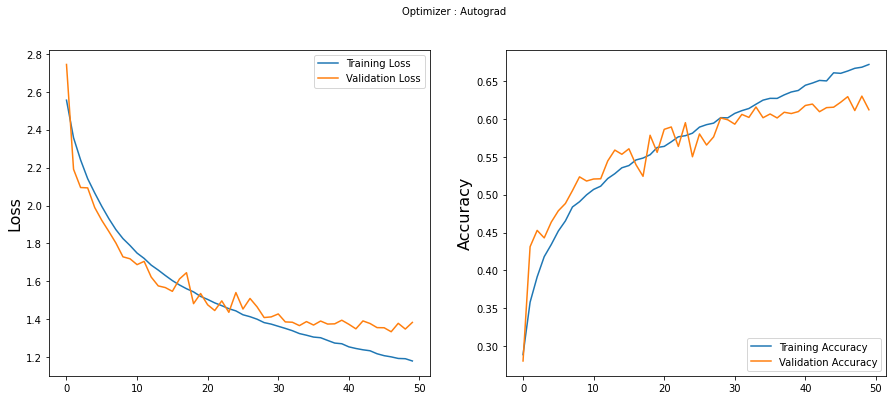

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Autograd', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

**CNN with 5 conolution layers, 3 hidden layers, optimizer=Adam, Activation=Relu**

In [58]:
model=Sequential()
#first convolution layer
model.add(Conv2D(64,(3,3),strides=(1,1),padding="same",input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.26))

#second convolution layer
model.add(Conv2D(256,(3,3),strides=(1,1),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.26))

#third convolution layer
model.add(Conv2D(256,(3,3),strides=(1,1),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.26))

#fourth convolution layer
model.add(Conv2D(512,(3,3),strides=(1,1),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.26))

#fifth convolution layer
model.add(Conv2D(512,(3,3),strides=(2,2),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.26))

model.add(Flatten())

#1st fully connected layer
model.add(Dense(4096,kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.26))

#2nd fully connected layer
model.add(Dense(2048,kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.26))

#3rd fully connected layer
model.add(Dense(1024,kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.26))


#last layer
model.add(Dense(7))
model.add(Activation('softmax'))

#compiling model
opti=Adam(learning_rate=0.001)
model.compile(optimizer=opti,loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_21 (Bat  (None, 48, 48, 128)      512       
 chNormalization)                                                
                                                                 
 activation_23 (Activation)  (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 24, 24, 128)      0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 24, 24, 128)       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 128)      

**training model**

In [59]:
%%time
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

batch_size=150
history = model.fit(train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=50,
                                validation_data = validation_gen,
                                validation_steps = validation_gen.n//validation_gen.batch_size,
                                callbacks=callbacks_list)

Epoch 1/50
899/900 [============================>.] - ETA: 0s - loss: 4.2945 - accuracy: 0.2560

900/900 [==============================] - 31s 33ms/step - loss: 4.2921 - accuracy: 0.2562 - val_loss: 2.4571 - val_accuracy: 0.3294
Epoch 2/50
900/900 [==============================] - ETA: 0s - loss: 1.9629 - accuracy: 0.3955

900/900 [==============================] - 32s 36ms/step - loss: 1.9629 - accuracy: 0.3955 - val_loss: 1.8532 - val_accuracy: 0.4023
Epoch 3/50
899/900 [============================>.] - ETA: 0s - loss: 1.8923 - accuracy: 0.4434

900/900 [==============================] - 29s 32ms/step - loss: 1.8921 - accuracy: 0.4435 - val_loss: 3.6984 - val_accuracy: 0.3672
Epoch 4/50
900/900 [==============================] - ETA: 0s - loss: 1.8464 - accuracy: 0.4683

900/900 [==============================] - 29s 32ms/step - loss: 1.8464 - accuracy: 0.4683 - val_loss: 1.7721 - val_accuracy: 0.5166
Epoch 5/50
900/900 [==============================] - ETA: 0s - loss: 1.7603 - accuracy: 0.4917

900/900 [==============================] - 30s 33ms/step - loss: 1.7603 - accuracy: 0.4917 - val_loss: 1.7544 - val_accuracy: 0.4723
Epoch 6/50
899/900 [============================>.] - ETA: 0s - loss: 1.7061 - accuracy: 0.5185

900/900 [==============================] - 29s 33ms/step - loss: 1.7060 - accuracy: 0.5185 - val_loss: 1.8060 - val_accuracy: 0.4717
Epoch 7/50
900/900 [==============================] - ETA: 0s - loss: 1.6375 - accuracy: 0.5312

900/900 [==============================] - 29s 33ms/step - loss: 1.6375 - accuracy: 0.5312 - val_loss: 1.7071 - val_accuracy: 0.4582
Epoch 8/50
899/900 [============================>.] - ETA: 0s - loss: 1.5683 - accuracy: 0.5515

900/900 [==============================] - 29s 32ms/step - loss: 1.5683 - accuracy: 0.5515 - val_loss: 1.7595 - val_accuracy: 0.4753
Epoch 9/50
899/900 [============================>.] - ETA: 0s - loss: 1.5416 - accuracy: 0.5602

900/900 [==============================] - 29s 32ms/step - loss: 1.5414 - accuracy: 0.5603 - val_loss: 1.7645 - val_accuracy: 0.4418
Epoch 10/50
900/900 [==============================] - ETA: 0s - loss: 1.5055 - accuracy: 0.5798

900/900 [==============================] - 30s 33ms/step - loss: 1.5055 - accuracy: 0.5798 - val_loss: 1.6648 - val_accuracy: 0.5317
Epoch 11/50
899/900 [============================>.] - ETA: 0s - loss: 1.4685 - accuracy: 0.5956

900/900 [==============================] - 29s 32ms/step - loss: 1.4684 - accuracy: 0.5956 - val_loss: 1.6398 - val_accuracy: 0.5375
Epoch 12/50
899/900 [============================>.] - ETA: 0s - loss: 1.4264 - accuracy: 0.6060

900/900 [==============================] - 29s 33ms/step - loss: 1.4265 - accuracy: 0.6060 - val_loss: 1.5713 - val_accuracy: 0.5463
Epoch 13/50
899/900 [============================>.] - ETA: 0s - loss: 1.3875 - accuracy: 0.6217

900/900 [==============================] - 30s 33ms/step - loss: 1.3880 - accuracy: 0.6214 - val_loss: 1.5126 - val_accuracy: 0.5676
Epoch 14/50
899/900 [============================>.] - ETA: 0s - loss: 1.3274 - accuracy: 0.6417

900/900 [==============================] - 29s 33ms/step - loss: 1.3277 - accuracy: 0.6417 - val_loss: 1.5695 - val_accuracy: 0.5757
Epoch 15/50
899/900 [============================>.] - ETA: 0s - loss: 1.2869 - accuracy: 0.6497

900/900 [==============================] - 29s 33ms/step - loss: 1.2869 - accuracy: 0.6496 - val_loss: 1.5177 - val_accuracy: 0.5668
Epoch 16/50
899/900 [============================>.] - ETA: 0s - loss: 1.2411 - accuracy: 0.6676

900/900 [==============================] - 29s 33ms/step - loss: 1.2412 - accuracy: 0.6676 - val_loss: 1.4772 - val_accuracy: 0.5777
Epoch 17/50
899/900 [============================>.] - ETA: 0s - loss: 1.1924 - accuracy: 0.6792

900/900 [==============================] - 29s 32ms/step - loss: 1.1923 - accuracy: 0.6792 - val_loss: 1.4626 - val_accuracy: 0.5830
Epoch 18/50
899/900 [============================>.] - ETA: 0s - loss: 1.1544 - accuracy: 0.6920

900/900 [==============================] - 29s 32ms/step - loss: 1.1544 - accuracy: 0.6920 - val_loss: 1.7794 - val_accuracy: 0.4908
Epoch 19/50
900/900 [==============================] - ETA: 0s - loss: 1.1005 - accuracy: 0.7036

900/900 [==============================] - 30s 34ms/step - loss: 1.1005 - accuracy: 0.7036 - val_loss: 1.3932 - val_accuracy: 0.6043
Epoch 20/50
899/900 [============================>.] - ETA: 0s - loss: 1.0560 - accuracy: 0.7168

900/900 [==============================] - 29s 32ms/step - loss: 1.0561 - accuracy: 0.7167 - val_loss: 1.3907 - val_accuracy: 0.5969
Epoch 21/50
899/900 [============================>.] - ETA: 0s - loss: 1.0098 - accuracy: 0.7355

900/900 [==============================] - 29s 32ms/step - loss: 1.0098 - accuracy: 0.7355 - val_loss: 1.4426 - val_accuracy: 0.5751
Epoch 22/50
900/900 [==============================] - ETA: 0s - loss: 0.9630 - accuracy: 0.7416

900/900 [==============================] - 32s 36ms/step - loss: 0.9630 - accuracy: 0.7416 - val_loss: 1.5133 - val_accuracy: 0.5888
Epoch 23/50
899/900 [============================>.] - ETA: 0s - loss: 0.9319 - accuracy: 0.7480

900/900 [==============================] - 32s 35ms/step - loss: 0.9318 - accuracy: 0.7481 - val_loss: 1.4178 - val_accuracy: 0.5886
Epoch 24/50
899/900 [============================>.] - ETA: 0s - loss: 0.8869 - accuracy: 0.7626

900/900 [==============================] - 32s 35ms/step - loss: 0.8868 - accuracy: 0.7626 - val_loss: 1.6080 - val_accuracy: 0.5335
Epoch 25/50
899/900 [============================>.] - ETA: 0s - loss: 0.8557 - accuracy: 0.7689

900/900 [==============================] - 29s 32ms/step - loss: 0.8555 - accuracy: 0.7689 - val_loss: 1.6240 - val_accuracy: 0.5428
Epoch 26/50
900/900 [==============================] - ETA: 0s - loss: 0.8128 - accuracy: 0.7825

900/900 [==============================] - 29s 33ms/step - loss: 0.8128 - accuracy: 0.7825 - val_loss: 1.4762 - val_accuracy: 0.5960
Epoch 27/50
899/900 [============================>.] - ETA: 0s - loss: 0.7856 - accuracy: 0.7894

900/900 [==============================] - 32s 35ms/step - loss: 0.7858 - accuracy: 0.7893 - val_loss: 1.3372 - val_accuracy: 0.6307
Epoch 28/50
900/900 [==============================] - ETA: 0s - loss: 0.7478 - accuracy: 0.8002

900/900 [==============================] - 29s 32ms/step - loss: 0.7478 - accuracy: 0.8002 - val_loss: 1.3345 - val_accuracy: 0.6212
Epoch 29/50
899/900 [============================>.] - ETA: 0s - loss: 0.7296 - accuracy: 0.8047

900/900 [==============================] - 29s 32ms/step - loss: 0.7296 - accuracy: 0.8047 - val_loss: 1.4473 - val_accuracy: 0.5844
Epoch 30/50
899/900 [============================>.] - ETA: 0s - loss: 0.7035 - accuracy: 0.8106

900/900 [==============================] - 31s 35ms/step - loss: 0.7034 - accuracy: 0.8106 - val_loss: 1.5748 - val_accuracy: 0.5869
Epoch 31/50
899/900 [============================>.] - ETA: 0s - loss: 0.6714 - accuracy: 0.8221

900/900 [==============================] - 29s 32ms/step - loss: 0.6713 - accuracy: 0.8221 - val_loss: 1.4429 - val_accuracy: 0.6094
Epoch 32/50
899/900 [============================>.] - ETA: 0s - loss: 0.6564 - accuracy: 0.8254

900/900 [==============================] - 31s 35ms/step - loss: 0.6561 - accuracy: 0.8255 - val_loss: 1.4936 - val_accuracy: 0.6011
Epoch 33/50
899/900 [============================>.] - ETA: 0s - loss: 0.6340 - accuracy: 0.8320

900/900 [==============================] - 29s 32ms/step - loss: 0.6340 - accuracy: 0.8321 - val_loss: 1.6718 - val_accuracy: 0.5832
Epoch 34/50
899/900 [============================>.] - ETA: 0s - loss: 0.6193 - accuracy: 0.8365

900/900 [==============================] - 29s 32ms/step - loss: 0.6195 - accuracy: 0.8365 - val_loss: 1.3086 - val_accuracy: 0.6345
Epoch 35/50
899/900 [============================>.] - ETA: 0s - loss: 0.5982 - accuracy: 0.8429

900/900 [==============================] - 32s 35ms/step - loss: 0.5981 - accuracy: 0.8430 - val_loss: 1.6083 - val_accuracy: 0.5807
Epoch 36/50
899/900 [============================>.] - ETA: 0s - loss: 0.5791 - accuracy: 0.8469

900/900 [==============================] - 29s 32ms/step - loss: 0.5792 - accuracy: 0.8469 - val_loss: 1.4978 - val_accuracy: 0.6109
Epoch 37/50
899/900 [============================>.] - ETA: 0s - loss: 0.5720 - accuracy: 0.8505

900/900 [==============================] - 29s 32ms/step - loss: 0.5719 - accuracy: 0.8506 - val_loss: 1.5589 - val_accuracy: 0.5983
Epoch 38/50
900/900 [==============================] - ETA: 0s - loss: 0.5583 - accuracy: 0.8558

900/900 [==============================] - 31s 35ms/step - loss: 0.5583 - accuracy: 0.8558 - val_loss: 1.4619 - val_accuracy: 0.6134
Epoch 39/50
899/900 [============================>.] - ETA: 0s - loss: 0.5402 - accuracy: 0.8592

900/900 [==============================] - 29s 32ms/step - loss: 0.5401 - accuracy: 0.8593 - val_loss: 1.7453 - val_accuracy: 0.5804
Epoch 40/50
899/900 [============================>.] - ETA: 0s - loss: 0.5333 - accuracy: 0.8627

900/900 [==============================] - 31s 35ms/step - loss: 0.5334 - accuracy: 0.8627 - val_loss: 1.5469 - val_accuracy: 0.5916
Epoch 41/50
899/900 [============================>.] - ETA: 0s - loss: 0.5180 - accuracy: 0.8648

900/900 [==============================] - 29s 32ms/step - loss: 0.5178 - accuracy: 0.8649 - val_loss: 1.4379 - val_accuracy: 0.6136
Epoch 42/50
900/900 [==============================] - ETA: 0s - loss: 0.4935 - accuracy: 0.8735

900/900 [==============================] - 29s 32ms/step - loss: 0.4935 - accuracy: 0.8735 - val_loss: 1.4812 - val_accuracy: 0.6224
Epoch 43/50
899/900 [============================>.] - ETA: 0s - loss: 0.4912 - accuracy: 0.8720

900/900 [==============================] - 31s 35ms/step - loss: 0.4914 - accuracy: 0.8720 - val_loss: 1.6654 - val_accuracy: 0.5872
Epoch 44/50
899/900 [============================>.] - ETA: 0s - loss: 0.4821 - accuracy: 0.8770

900/900 [==============================] - 29s 32ms/step - loss: 0.4821 - accuracy: 0.8770 - val_loss: 1.5965 - val_accuracy: 0.6186
Epoch 45/50
899/900 [============================>.] - ETA: 0s - loss: 0.4686 - accuracy: 0.8789

900/900 [==============================] - 29s 32ms/step - loss: 0.4689 - accuracy: 0.8788 - val_loss: 1.9104 - val_accuracy: 0.5631
Epoch 46/50
899/900 [============================>.] - ETA: 0s - loss: 0.4695 - accuracy: 0.8800

900/900 [==============================] - 31s 35ms/step - loss: 0.4692 - accuracy: 0.8801 - val_loss: 1.5649 - val_accuracy: 0.6060
Epoch 47/50
899/900 [============================>.] - ETA: 0s - loss: 0.4557 - accuracy: 0.8856

900/900 [==============================] - 29s 32ms/step - loss: 0.4556 - accuracy: 0.8857 - val_loss: 1.5064 - val_accuracy: 0.6109
Epoch 48/50
900/900 [==============================] - ETA: 0s - loss: 0.4394 - accuracy: 0.8894

900/900 [==============================] - 32s 35ms/step - loss: 0.4394 - accuracy: 0.8894 - val_loss: 1.6424 - val_accuracy: 0.6068
Epoch 49/50
899/900 [============================>.] - ETA: 0s - loss: 0.4413 - accuracy: 0.8868

900/900 [==============================] - 29s 33ms/step - loss: 0.4412 - accuracy: 0.8868 - val_loss: 1.5368 - val_accuracy: 0.6118
Epoch 50/50
899/900 [============================>.] - ETA: 0s - loss: 0.4362 - accuracy: 0.8884

900/900 [==============================] - 30s 33ms/step - loss: 0.4362 - accuracy: 0.8884 - val_loss: 1.8378 - val_accuracy: 0.5273
CPU times: user 28min 22s, sys: 1min 32s, total: 29min 55s
Wall time: 28min


In [61]:
train_time['Adam']=28

**Performance**

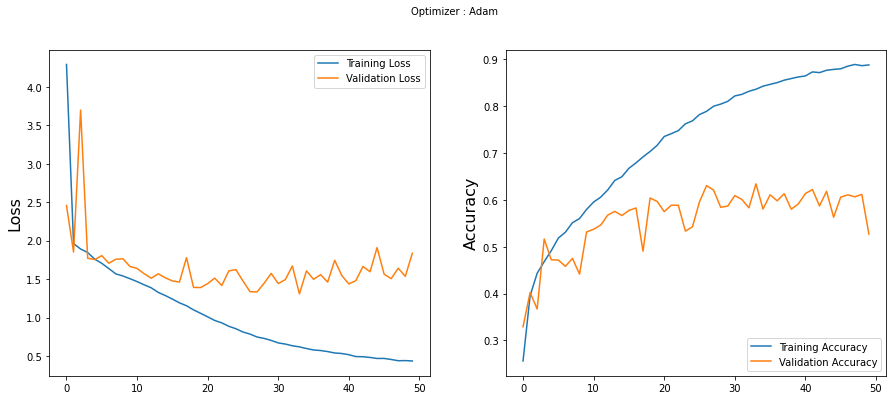

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

**Training time comparsion**

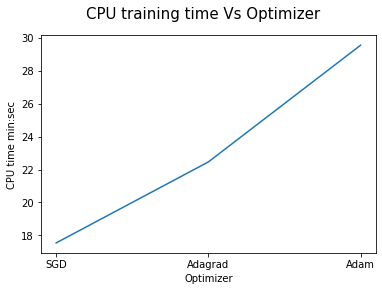

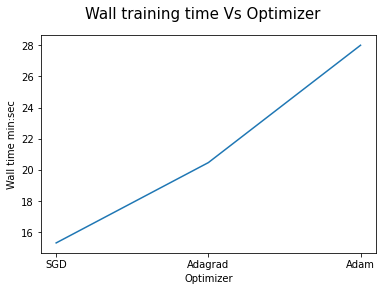

In [103]:
wall_time=[15.3,20.46,28]
cpu_time=[17.54,22.46,29.55]
opt=['SGD','Adagrad','Adam']

plt.suptitle('CPU training time Vs Optimizer',fontsize=15)
plt.xlabel('Optimizer', fontsize=10)
plt.ylabel('CPU time min:sec', fontsize=10)
plt.plot(opt,cpu_time)
plt.show()


plt.suptitle('Wall training time Vs Optimizer',fontsize=15)
plt.xlabel('Optimizer', fontsize=10)
plt.ylabel('Wall time min:sec', fontsize=10)
plt.plot(opt,wall_time)
plt.show()



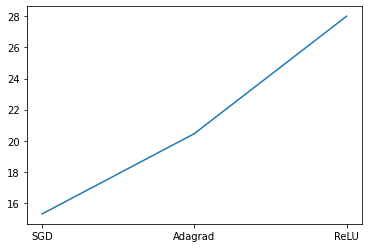

<Axes: >

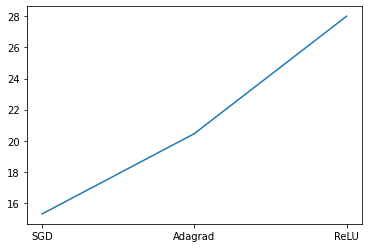

In [93]:
sns.lineplot(x=opt,y=cpu_time)